# Predicting House Sale Price

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

![](https://housepriceprediction.com/wp-content/uploads/2018/07/11679.4c96032809c10d54e3e216015aecf32a_XL.jpg)

Our task is to **predict** the house sale price by using **Linear Regression** Model.

## Importing Dependencies

In [106]:
# Import all the libraries and modules necessary for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold

## Exploring Data Set

In [107]:
# creating pandas DataFrame.
house_df = pd.read_csv("AmesHousing.tsv",delimiter = '\t')

In [108]:
house_df.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [109]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

## Creating functions to transorm, train & test data

In [110]:
# transforming the features for training and testing.

def transform_features():
    train_df = house_df.iloc[:1460]
    test_df = house_df.iloc[1460:]
    return train_df,test_df

def select_features():
    
    
    return(['Gr Liv Area','Saleprice'])

def train_and_test():
    
    train,test = transform_features()
    features = select_features()
    features = features.remove('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[[features]],train['SalePrice'])
    predicted = lr.predict(test[[features]])
    rmse = mean_squared_error(test['SalePrice'],predicted)
    
    return rmse

## Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns.

1.) Remove column frame with more than 25% missing data.


2.) Imputing numerical column with most famous value with less than 5 % missing data.


3.) Imputing and dropping remaing numericals columns based on its significance.


4.) Creating New Column Like Year Built


5.) Dealing with the **'objective'** column having missing values.

#### Removing Columns with more than 25% missing data. 

In [111]:
prop = house_df.isnull().sum()/house_df.shape[0]
x = prop[prop >= .25]
x

Alley           0.932423
Fireplace Qu    0.485324
Pool QC         0.995563
Fence           0.804778
Misc Feature    0.963823
dtype: float64

Above columns have more than 25% missing data. So, we will drop this column now and llater we will update this in transform_feature() function also.

In [112]:
cols = list(x.index)
cols

['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

In [113]:
house_df.drop(columns = cols,axis = 1,inplace = True)
house_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [114]:
prop = house_df.isnull().sum()/house_df.shape[0]
x = prop[prop >= .25]
x

Series([], dtype: float64)

#### Imputing numerical column with most famous value with less than 5 % missing data

In [115]:
x = prop[prop <= 0.05]

In [116]:
numeric_df = house_df[list(x.index)].select_dtypes(include = 'number')

In [117]:
a = numeric_df.isnull().sum()
x = a[a!= 0]
x

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [118]:

mode_dict = {}
for each in list(x.index):
    mode_dict[each] = house_df[each].mode()[0]

In [119]:
house_df = house_df.fillna(mode_dict)

In [120]:
house_df.select_dtypes(include = 'number').isnull().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         0
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

Since,only two numerical data have missing values.The year on which garage built is an irrelevant column but the Lot Frontage is a relevant column. So, we will drop **Garage Yr Blt** column and fill mean value in **Lot Frontage** column.

#### Imputing and dropping remaing numericals columns based on its significance.

In [121]:
house_df = house_df.drop('Garage Yr Blt',axis = 1)

In [122]:
house_df = house_df.fillna({'Lot Frontage': house_df['Lot Frontage'].mean()})

In [123]:
house_df.select_dtypes(include = 'number').notnull().sum()

Order              2930
PID                2930
MS SubClass        2930
Lot Frontage       2930
Lot Area           2930
Overall Qual       2930
Overall Cond       2930
Year Built         2930
Year Remod/Add     2930
Mas Vnr Area       2930
BsmtFin SF 1       2930
BsmtFin SF 2       2930
Bsmt Unf SF        2930
Total Bsmt SF      2930
1st Flr SF         2930
2nd Flr SF         2930
Low Qual Fin SF    2930
Gr Liv Area        2930
Bsmt Full Bath     2930
Bsmt Half Bath     2930
Full Bath          2930
Half Bath          2930
Bedroom AbvGr      2930
Kitchen AbvGr      2930
TotRms AbvGrd      2930
Fireplaces         2930
Garage Cars        2930
Garage Area        2930
Wood Deck SF       2930
Open Porch SF      2930
Enclosed Porch     2930
3Ssn Porch         2930
Screen Porch       2930
Pool Area          2930
Misc Val           2930
Mo Sold            2930
Yr Sold            2930
SalePrice          2930
dtype: int64

#### Creating New Column

In [124]:
house_df['years_until_remod'] = house_df['Year Built'] - house_df['Year Remod/Add']

In [125]:
house_df['house_age'] = house_df['Year Built'] - house_df['Yr Sold']

In [126]:
house_df = house_df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis = 1)

#### Dealing with the 'objective' column having missing values.

In [127]:
x = house_df.isnull().sum()
a = x[x>0]
a

Mas Vnr Type       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin Type 2     81
Electrical          1
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
dtype: int64

In [128]:
house_df = house_df.dropna(axis = 0)

Since, all the object columns have missing values near to 5% so, it's best to drop all these rows.

In [129]:
x = house_df.isnull().sum()
x[x>0]

Series([], dtype: int64)

#### Updating `transform_features` function

In [130]:
def transform_features(house_df):
    
    prop = house_df.isnull().sum()/house_df.shape[0]
    x = prop[prop >= .25]
    cols = list(x.index)
    house_df.drop(columns = cols,axis = 1,inplace = True)
    
    
    x = prop[prop <= 0.05]
    numeric_df = house_df[list(x.index)].select_dtypes(include = 'number')
    mode_dict = {}
    for each in list(x.index):
        mode_dict[each] = house_df[each].mode()[0]
    house_df = house_df.fillna(mode_dict)
    
    
    house_df.drop('Garage Yr Blt',axis = 1,inplace = True)
    house_df = house_df.fillna({'Lot Frontage': house_df['Lot Frontage'].mean()})
    
   
    house_df['years_until_remod'] = house_df['Year Built'] - house_df['Year Remod/Add']
    house_df['house_age'] = house_df['Year Built'] - house_df['Yr Sold']
    house_df = house_df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis = 1)
    
    
    
    house_df = house_df.dropna(axis = 0)
    
    
    
    return house_df


## Feature Selection

#### Numerical Column

In [131]:
a = house_df.select_dtypes(include = 'number').columns

In [132]:
len(a)

37

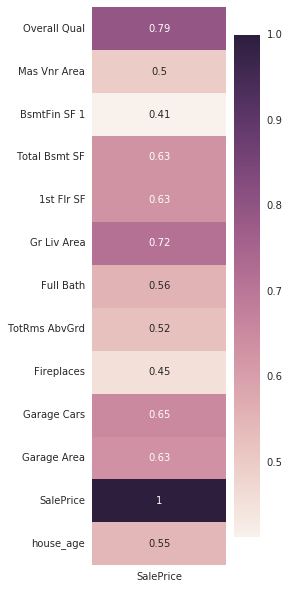

In [133]:
%matplotlib inline

corr =  house_df[a].corr().loc[:, ['SalePrice']]
plt.figure(figsize = (3,10))

sns.heatmap(corr[corr > 0.4].dropna(),annot = True)


In [134]:
corr_high = corr[corr > 0.4].dropna()
corr_high

,SalePrice
Overall Qual,0.793249
Mas Vnr Area,0.499652
BsmtFin SF 1,0.412925
Total Bsmt SF,0.630305
1st Flr SF,0.630424
Gr Liv Area,0.715867
Full Bath,0.555861
TotRms AbvGrd,0.523363
Fireplaces,0.452517
Garage Cars,0.652448


In [135]:
house_df.drop(columns = list(corr[corr<0.4].dropna().index),axis = 1 , inplace = True)

In [136]:
house_df.select_dtypes(include = ['number']).columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'SalePrice', 'house_age'],
      dtype='object')

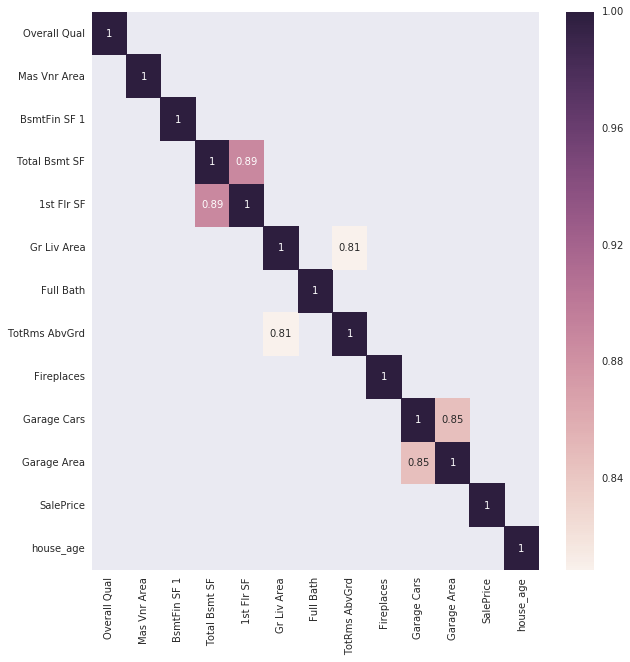

In [137]:
a = house_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(a[a>0.8],annot = True)

In [138]:
house_df.drop(columns = ['1st Flr SF','TotRms AbvGrd','Garage Cars'],axis = 1 , inplace = True)

#### Object Column

In [139]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [140]:
transform_cat_col = []

for col in nominal_features:
    if col in house_df.columns:
        transform_cat_col.append(col)

        
transform_cat_col

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Sale Type',
 'Sale Condition']

In [141]:
a = house_df[transform_cat_col].describe()
a

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type,Sale Condition
count,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
unique,6,2,4,5,28,9,8,5,8,6,8,14,16,5,5,4,2,6,10,6
top,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,WD,Normal
freq,2112,2669,2409,1946,416,2324,2650,2258,1343,2106,2641,965,952,1549,1242,2650,2559,1676,2317,2226


In [142]:
x = a.loc['unique',:]
x[x>10]

Neighborhood    28
Exterior 1st    14
Exterior 2nd    16
Name: unique, dtype: object

In [143]:
house_df.drop(x[x>10].index,axis = 1,inplace = True)
transform_cat_col = list(x[x<=10].index)

In [144]:
a = house_df[transform_cat_col].describe()
a

,MS Zoning,Street,Land Contour,Lot Config,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type,Sale Condition
count,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
unique,6,2,4,5,9,8,5,8,6,8,5,5,4,2,6,10,6
top,RL,Pave,Lvl,Inside,Norm,Norm,1Fam,1Story,Gable,CompShg,None,PConc,GasA,Y,Attchd,WD,Normal
freq,2112,2669,2409,1946,2324,2650,2258,1343,2106,2641,1549,1242,2650,2559,1676,2317,2226


In [145]:
x = a.loc['freq',:]/a.loc['count',:]
x[x>.8]

Street            0.996639
Land Contour      0.899552
Condition 1       0.867812
Condition 2       0.989544
Bldg Type         0.843167
Roof Matl         0.986184
Heating           0.989544
Central Air       0.955564
Sale Type         0.865198
Sale Condition    0.831217
dtype: object

In [146]:
house_df.drop(list(x[x>.8].index),axis = 1, inplace = True)

In [147]:
text_cols = house_df.select_dtypes(include = ['object']).columns
for col in text_cols:
    house_df[col] = house_df[col].astype('category')
transformed_df = pd.concat([house_df,pd.get_dummies(house_df[text_cols])],axis = 1).drop(text_cols,axis = 1)

In [148]:
transformed_df.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,SalePrice,house_age,...,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1,2,528.0,215000,-50,...,0,1,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,1,0,730.0,105000,-49,...,0,1,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1,0,312.0,172000,-52,...,0,1,0,0,0,0,1,0,0,1
3,7,0.0,1065.0,2110.0,2110,2,2,522.0,244000,-42,...,0,1,0,0,0,0,1,0,0,1
4,5,0.0,791.0,928.0,1629,2,1,482.0,189900,-13,...,0,1,0,0,0,0,1,0,0,1


In [149]:
house_df.select_dtypes(include = ['object']).columns

Index([], dtype='object')

#### Updating `select_features` function

In [150]:
def select_features(house_df):
    
    
    a = house_df.select_dtypes(include = 'number').columns
    corr =  house_df[a].corr().loc[:, ['SalePrice']]
    house_df.drop(columns = list(corr[corr<0.4].dropna().index),axis = 1 , inplace = True)
    
    
    house_df.drop(columns = ['1st Flr SF','TotRms AbvGrd','Garage Cars'],axis = 1 , inplace = True)
    
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    transform_cat_col = []

    for col in nominal_features:
        if col in house_df.columns:
            transform_cat_col.append(col)
            
    a = house_df[transform_cat_col].describe() 
    x = a.loc['unique',:]
    house_df.drop(x[x>10].index,axis = 1,inplace = True)
    transform_cat_col = list(x[x<=10].index)
    
    a = house_df[transform_cat_col].describe()
    x = a.loc['freq',:]/a.loc['count',:]
    house_df.drop(list(x[x>.8].index),axis = 1, inplace = True)
    
    text_cols = house_df.select_dtypes(include = ['object']).columns
    for col in text_cols:
        house_df[col] = house_df[col].astype('category')
    transformed_df = pd.concat([house_df,pd.get_dummies(house_df[text_cols])],axis = 1).drop(text_cols,axis = 1)
    
    
    
    return transformed_df

In [151]:
# df = transform_features(house_df)
# df = select_features(df)
# df.head()

## Train And Test

#### updating `train_and_test` function

In [185]:
def train_and_test(house_df,k=0):
    
    features = house_df.select_dtypes(include = ['number','float']).columns
    features = features.drop('SalePrice')
    target = 'SalePrice'
    lr = LinearRegression()
    
    if k == 0:
        train = house_df.iloc[:1460]
        test = house_df.iloc[1460:]
        
        lr.fit(train[features],train[target])
        predict = lr.predict(test[features])
        avg_rmse = mean_squared_error(test[target],predict)**(1/2)
    if k==1:
        
        shuffled_df = house_df.sample(frac=1, )
        train = house_df[:1460]
        test = house_df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
    else:
        rmse_val =[]
        kf = KFold(n_splits=k, shuffle = True,random_state=3)
        for train_index,test_index in kf.split(house_df[features]):
            X_train,X_test = house_df[features].iloc[train_index],house_df[features].iloc[test_index]
            Y_train,Y_test = house_df[target].iloc[train_index],house_df[target].iloc[test_index]
            
            
            lr.fit(X_train,Y_train)
            predictions = lr.predict(X_test)
            mse = mean_squared_error(Y_test,predictions)
            rmse = mse**(1/2)
            rmse_val.append(rmse)
            
        avg_rmse = np.mean(rmse_val)
            
    return rmse

In [186]:
rmse_avg = train_and_test(transformed_df,k = 4)

In [187]:
rmse_avg

28582.91263711336